##### movies-q3 notebook
***

<h1>Question 3 - What genres have been the most lucrative?</h1>

    1. What genres appear most frequently?
    2. Which earned the most in 2018? ...2016-18?
    3. What mix of genres do top studios use?

### importing required libraries

In [1]:
import os # for setting the current directory

import numpy as np
import pandas as pd

import sqlite3
import pandasql

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# setting the current working directory
os.chdir("c:/users/jd/flatiron/project01/dsc-mod-1-project-v2-1-online-ds-ft-120919/")

# printing the current working directory
print(os.getcwd())

c:\users\jd\flatiron\project01\dsc-mod-1-project-v2-1-online-ds-ft-120919


### Connecting to sqlite database

In [3]:
# connecting to sql movies_db data source and instantiate a cursor
conn = sqlite3.connect("movies_db.sqlite")
cur = conn.cursor()

### listing the sqlite table names

In [4]:
# getting names of all tables in the sql database
sql_tables = conn.execute("select name from sqlite_master where type='table';")

# assigning table names to a variable as a list for future iteration
table_list = list(map(lambda x: x[0], sql_tables.fetchall()))
table_list

['clean_bom_tbl', 'clean_tn_tbl', 'studio_titles_tbl', 'clean_imdb_title_tbl']

***

<h2 align='center'><font color='chocolate'>Genres</font></h2>

We can find titles with their genres in the `clean_imdb_title_tbl`.

### Querying sqlite3 to view `clean_imdb_title_tbl`

In [5]:
# connecting to the required table as a temporary table
# using temporary table to inspect data
cur.execute('''SELECT *
                    FROM clean_imdb_title_tbl
                    WHERE start_year BETWEEN 2016 AND 2018
                    ;''')

data_df = pd.DataFrame(cur.fetchall())
data_df.columns = [x[0] for x in cur.description]

print(data_df.shape)
data_df.head(3)

(49462, 34)


,tconst,index,primary_title,original_title,start_year,runtime_minutes,genres,sport,adventure,history,...,war,biography,action,crime,game-show,music,family,news,sci-fi,mystery
0,tt0069049,2,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0069204,3,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0100275,4,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Dropping columns and rows

In [6]:
# deleting all rows where column `genres` has value 'None' 
print("Starting count of empty 'genres':", data_df.genres.isnull().sum())
data_df = data_df[data_df['genres'].notnull()]
print("Ending count of empty 'genres':", data_df.genres.isnull().sum())

Starting count of empty 'genres': 0
Ending count of empty 'genres': 0


In [7]:
# removing unnecessary columns
data_df.drop(columns = ['index', 'original_title', 'runtime_minutes'])

# setting the index
data_df.set_index("tconst", inplace=True)

In [8]:
# copying to our separate, working dataframe
clean_imdb_title_df = data_df.copy(deep=True)

print(clean_imdb_title_df.shape)

# verifying removal of rows with no genres
clean_imdb_title_df[clean_imdb_title_df['genres'].isnull() == True]

(49462, 33)


,index,primary_title,original_title,start_year,runtime_minutes,genres,sport,adventure,history,romance,...,war,biography,action,crime,game-show,music,family,news,sci-fi,mystery
tconst,,,,,,,,,,,,,,,,,,,,,


No rows without genres remain.

In [9]:
# updated df changes to the sqlite database table
clean_imdb_title_df.to_sql('clean_imdb_title_tbl', conn, if_exists='replace')

<h2 align='center'><font color='coral'>Counting Genres</font></h2>

### Counting the occurrences of any individual genre

In [10]:
# shortening the dataframe name
df0 = clean_imdb_title_df

In [11]:
# counting the number of True boolean markers (1s) indicated in the `drama` column/ series
len(df0[df0['drama'] == 1])

16834

In [12]:
# verify our count of the value 1s in the `drama` column
df0['drama'].value_counts()

0    32628
1    16834
Name: drama, dtype: int64

In [13]:
# making a list of all genre column names
genre_names = [col for col in df0.columns[6:]]

# an equal - length list of all genre counts for value 1
genre_counts = [len(df0[df0[g] == 1]) for g in genre_names]

# bringing the two lists together as tuples
genre_tuples_list = list(zip(genre_names, genre_counts))

# viewing the list of tuples
genre_tuples_list

[('sport', 709),
 ('adventure', 1995),
 ('history', 1523),
 ('romance', 3032),
 ('talk-show', 17),
 ('fantasy', 1278),
 ('drama', 16834),
 ('documentary', 17501),
 ('musical', 492),
 ('horror', 3964),
 ('short', 9),
 ('animation', 975),
 ('thriller', 4252),
 ('comedy', 8478),
 ('adult', 18),
 ('western', 153),
 ('reality-tv', 45),
 ('war', 468),
 ('biography', 2154),
 ('action', 3592),
 ('crime', 2366),
 ('game-show', 2),
 ('music', 1620),
 ('family', 1738),
 ('news', 125),
 ('sci-fi', 1192),
 ('mystery', 1665)]

#### Converting the list to a dataframe and visualizing

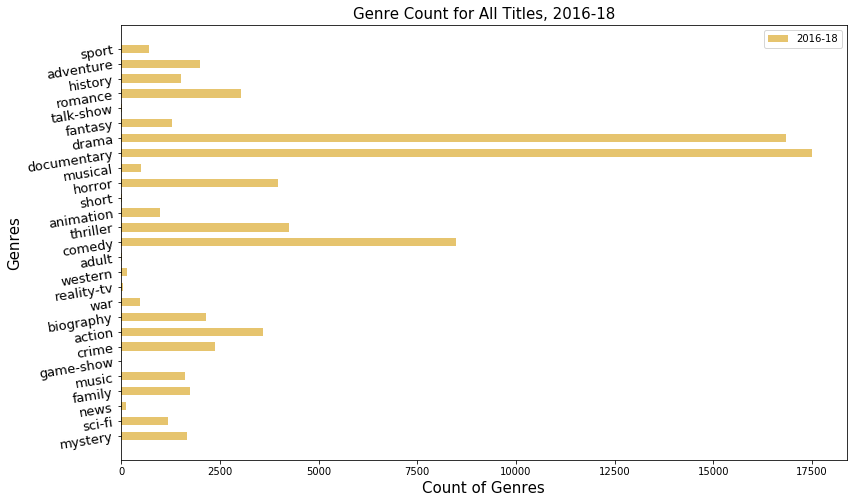

In [14]:

genre_counts_df = pd.DataFrame(genre_tuples_list, columns = ['genre_names' , 'genre_counts'])
gcdf = genre_counts_df

# defining axes
x = gcdf.genre_names
y = gcdf.genre_counts

# creating the figure
plt.figure(figsize=(13, 8))
width = 0.55       # the width of the bars
plt.grid(b=True, which='minor', color='#888888', linestyle='-.')
plt.barh(x, y, -width, color='goldenrod', align='center', alpha=.65,  label = '2016-18')
plt.ylim(plt.ylim()[::-1])

# defining labels
plt.ylabel('Genres', fontsize=15)
plt.yticks(fontsize=13, rotation=9)
plt.xlabel('Count of Genres', fontsize=15)
plt.title(f'Genre Count for All Titles, 2016-18', fontsize=15)

plt.legend()
plt.show()


From this vizualization, it looks like a runaway for documentaries. Of course, we want to look at earnings for these genres.

We already have a table for title, studio, and total gross, for movies released between 2016-18.

### Import and Join

In [15]:
# connecting to the required table
cur.execute('''SELECT *
                    FROM studio_titles_tbl s
                    JOIN clean_imdb_title_tbl c
                    ON s.title = c.primary_title
                    ;''')

joined_studio_genres_df = pd.DataFrame(cur.fetchall())
joined_studio_genres_df.columns = [x[0] for x in cur.description]
display(joined_studio_genres_df.shape)
joined_studio_genres_df.head()

(806, 38)

,index,studio,title,Total_gross,tconst,index,primary_title,original_title,start_year,runtime_minutes,...,war,biography,action,crime,game-show,music,family,news,sci-fi,mystery
0,0,bv,Black Panther,1.347000e+09,tt1825683,19050,Black Panther,Black Panther,2018,134.0,...,0,0,1,0,0,0,0,0,1,0
1,1,bv,Star Wars: The Last Jedi,1.332600e+09,tt2527336,42223,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017,152.0,...,0,0,1,0,0,0,0,0,0,0
2,2,uni,Jurassic World: Fallen Kingdom,1.309500e+09,tt4881806,84414,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,128.0,...,0,0,1,0,0,0,0,0,1,0
3,4,bv,Incredibles 2,1.242800e+09,tt3606756,62741,Incredibles 2,Incredibles 2,2018,118.0,...,0,0,1,0,0,0,0,0,0,0
4,5,bv,Captain America: Civil War,1.153300e+09,tt3498820,60379,Captain America: Civil War,Captain America: Civil War,2016,147.0,...,0,0,1,0,0,0,0,0,1,0


Limiting films by those with stated genres took 258 rows off of the `studio_titles` table. Limiting titles to those from our 6 top studios removed almost 32000 rows.

In [16]:
# dropping unneeded columns
jsg = joined_studio_genres_df.drop(columns = ['index', 'tconst', 'original_title', 'runtime_minutes'])

# setting the index
jsg.set_index("title", inplace=True)
display(jsg.shape)

pd.set_option('display.max_columns', None) # expand to inspect all columns
jsg.head()

(806, 32)

,studio,Total_gross,primary_title,start_year,genres,sport,adventure,history,romance,talk-show,fantasy,drama,documentary,musical,horror,short,animation,thriller,comedy,adult,western,reality-tv,war,biography,action,crime,game-show,music,family,news,sci-fi,mystery
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Black Panther,bv,1.347000e+09,Black Panther,2018,"Action,Adventure,Sci-Fi",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
Star Wars: The Last Jedi,bv,1.332600e+09,Star Wars: The Last Jedi,2017,"Action,Adventure,Fantasy",0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Jurassic World: Fallen Kingdom,uni,1.309500e+09,Jurassic World: Fallen Kingdom,2018,"Action,Adventure,Sci-Fi",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
Incredibles 2,bv,1.242800e+09,Incredibles 2,2018,"Action,Adventure,Animation",0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Captain America: Civil War,bv,1.153300e+09,Captain America: Civil War,2016,"Action,Adventure,Sci-Fi",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


***

<h2 align='center'><font color='coral'>Earnings by Genre</font></h2>

### How much money does each genre make for top studios?

In [17]:
# getting the sum of `Total_gross` where `drama` is equal to 1 
jsg[jsg['drama'] == 1]['Total_gross'].sum()

20506547200.0

In [18]:
# repeating for 2018, only
jsg[(jsg['drama'] == 1) & (jsg['start_year'] == 2018)]['Total_gross'].sum()

5125591500.0

### Building the tuple list for 2016-2018

In [19]:
# using our list of all genre column names 'genre_names'
# genre_names = [col for col in jsg.columns[6:]]

# an equal - length list of all genre `Total_gross` sums value 1
genre_gross = [jsg[jsg[g] == 1]['Total_gross'].sum() for g in genre_names]
genre_gross_18 = [jsg[(jsg[g] == 1) & (jsg['start_year'] == 2018)]['Total_gross'
                                                       ].sum() for g in genre_names]

# bringing the two lists together as tuples
genre_gross_tuples = list(zip(genre_names, genre_gross))
genre_gross_tuples_18 = list(zip(genre_names, genre_gross_18))

#### Converting the list to a dataframe and visualizing

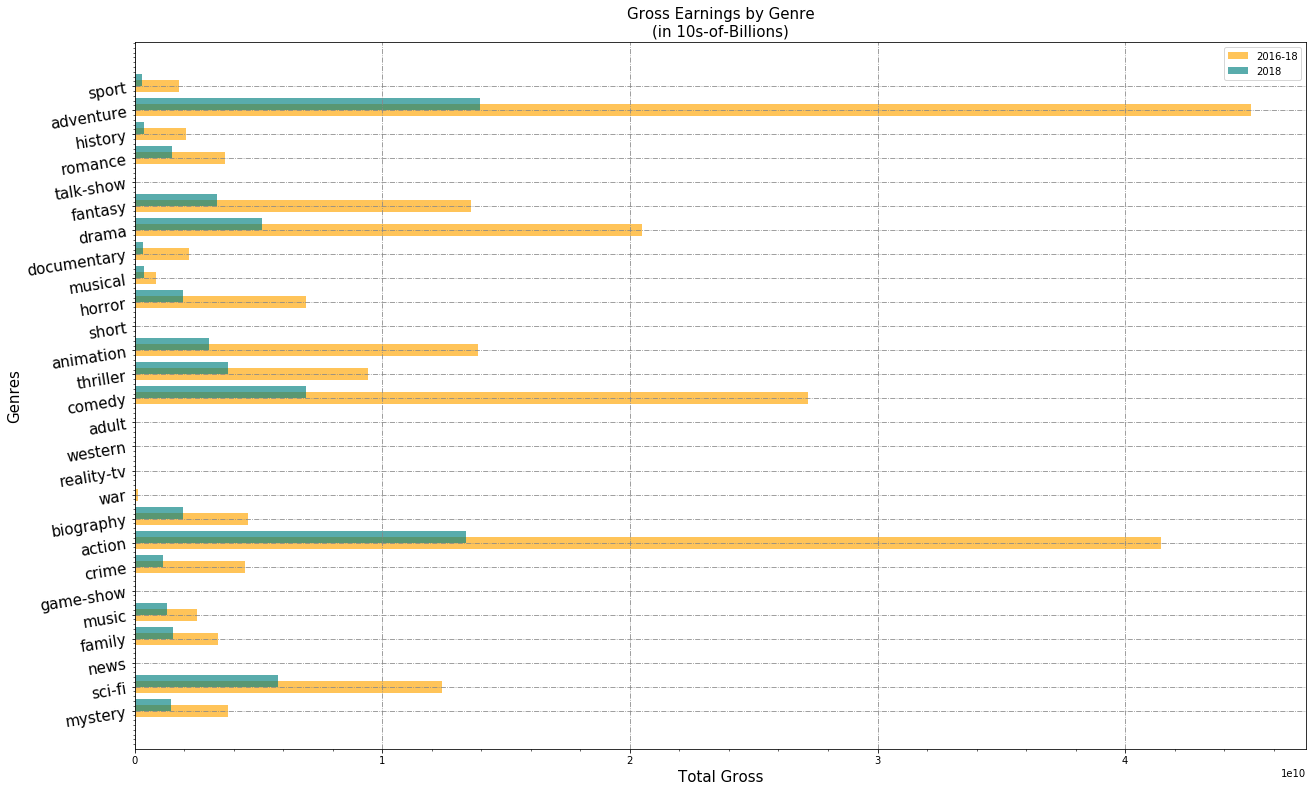

In [20]:
# converting list of tuples to dataframe
ggt = pd.DataFrame(genre_gross_tuples, columns = ['genre_names' , 'genre_gross'])
ggt18 = pd.DataFrame(genre_gross_tuples_18, columns = ['genre_names' , 'genre_gross_18'])

# defining axes
x1 = ggt.genre_names
x2 = ggt18.genre_names
y1 = ggt.genre_gross
y2 = ggt18.genre_gross_18

# creating the figure
plt.figure(figsize=(21, 13))
width = 0.5       # the width of the bars
plt.grid(b=True, which='major', color='#888888', linestyle='-.')
plt.minorticks_on()
plt.barh(x1, y1, width, color='orange', align='center', alpha=.65,  label = '2016-18')
plt.barh(x2, y2, -width, color='teal', align='edge', alpha=.65,  label = '2018')

plt.ylim(plt.ylim()[::-1])

# defining labels
plt.ylabel('Genres', fontsize=15)
plt.yticks(fontsize=15, rotation=9)
plt.xlabel('Total Gross', fontsize=15)
plt.title(f'Gross Earnings by Genre\n(in 10s-of-Billions)', fontsize=15)

plt.legend()
plt.show()


Adventure, action, and comedy take on significance, when the focus is placed on earnings. How do studios balance that.

### What genres of movies are most often used in top - studio productions?

In [21]:
# using our list of all genre column names 'genre_names'
# genre_names = [col for col in jsg.columns[6:]]

# an equal - length list of all genre counts for value 1
freq_counts = [len(jsg[jsg[g] == 1]) for g in genre_names]
freq_counts_18 = [len((jsg[(jsg[g] == 1
                           ) & (jsg['start_year'] == 2018
                               )]
                      )
                     ) for g in genre_names]

# bringing the lists together as tuples
studio_top_gen_freq = list(zip(genre_names, freq_counts))
studio_top_gen_freq_18 = list(zip(genre_names, freq_counts_18))


#### Converting the list to a dataframe and visualizing

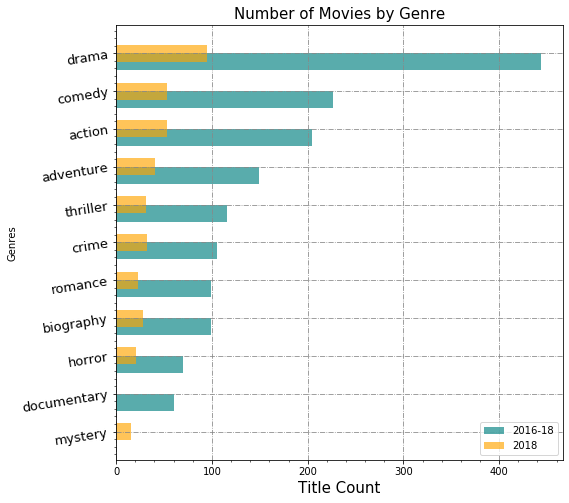

In [22]:
# limiting output to the top - ten for each analysis period
stgf = pd.DataFrame(studio_top_gen_freq, columns = ['genre_names' , 'freq_counts']
                   ).sort_values(by='freq_counts', ascending=False).head(10)
stgf_18 = pd.DataFrame(studio_top_gen_freq_18, columns = ['genre_names' , 'freq_counts_18']
                      ).sort_values(by='freq_counts_18', ascending=False).head(10)

# defining axes
x1 = stgf.genre_names
x2 = stgf_18.genre_names
y1 = stgf.freq_counts
y2 = stgf_18.freq_counts_18

# creating the figure
plt.figure(figsize=(8, 8))
width = 0.45       # the width of the bars
plt.grid(b=True, which='major', color='#888888', linestyle='-.')
plt.minorticks_on()
plt.barh(x1, y1, width, color='teal', align='edge', alpha=.65,  label = '2016-18')
plt.barh(x2, y2, -width, color='orange', align='center', alpha=.65,  label = '2018')
plt.ylim(plt.ylim()[::-1])

# defining labels
plt.ylabel('Genres', fontsize=10)
plt.yticks(fontsize=13, rotation=9)
plt.xlabel('Title Count', fontsize=15)
plt.title(f'Number of Movies by Genre', fontsize=15)

plt.legend()
plt.show()


Documentaries are not nearly as prevalent a genre among top studios.

### Looking for changes at the top

***

<h2 align='center'><font color='Coral'>Recommendations</font></h2>

***

There seems to be a formula at work, in the movie business. The ratio of genres produced by top studios seems to have remained fairly constant. We can verify that by analyzing more closely central tendencies of top studios, including budget - spend and peak release cycles by genre.

Of course, there were a number of tables we did not yet explore. A more comprehensive reviews database could be valuable. Current resources do not indicate which reviews were provided prior to home release, or when income was generated, facts which make them less useful to predictive investigation.

We do see a strong and rewarded showing by sequels, series, and fantasy (whether live - action, animated, or computer - generated. This is good news, for an industry that is currently increasing its footprint accross platforms, from theaters and festivals to streaming services.

Adventure, action, comedy, and drama seem to be the ways to go. ROI consideration could be informative. It takes a lot of budget to make a blockbuster, but there do seem to be sweet sposts where a relatively modest investment is more likely than not to result in a comfortable return.

For big swings, we need to determine how to deal with outliers. Many of the movies that made the most cost the most.

In [23]:
cur.close()
conn.close()